In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities.model import Model
import nwsrfs_models.main as s
#import lagk_f2py_old.model_lagk as lagk

#from utilities.model import Model

In [2]:
help(s)

Help on module nwsrfs_models.main in nwsrfs_models:

NAME
    nwsrfs_models.main

DESCRIPTION
    This module 'main' is auto-generated with f2py (version:2).
    Functions:
      lagk_out = lagk(ita,itb,meteng,lagtbl,ktbl,ico,iinfl,ioutfl,istor,qa,n_hrus=shape(lagtbl,1),sim_length=shape(qa,0))
      tci = sacsnow(dt,year,month,day,hour,latitude,elev,area,uztwm,uzfwm,lztwm,lzfpm,lzfsm,adimp,uzk,lzpk,lzsk,zperc,rexp,pctim,pfree,riva,side,rserv,peadj,pxadj,peadj_m,scf,mfmax,mfmin,uadj,si,nmf,tipm,mbase,plwhc,daygm,adc_a,adc_b,adc_c,map_fa_pars,mat_fa_pars,pet_fa_pars,ptps_fa_pars,map_fa_limits,mat_fa_limits,pet_fa_limits,ptps_fa_limits,init,map,ptps,mat,n_hrus=len(latitude),sim_length=len(year))
      tci,aet,uztwc,uzfwc,lztwc,lzfsc,lzfpc,adimc,swe = sacsnowstates(dt,year,month,day,hour,latitude,elev,area,uztwm,uzfwm,lztwm,lzfpm,lzfsm,adimp,uzk,lzpk,lzsk,zperc,rexp,pctim,pfree,riva,side,rserv,peadj,pxadj,peadj_m,scf,mfmax,mfmin,uadj,si,nmf,tipm,mbase,plwhc,daygm,adc_a,adc_b,adc_c,map_fa_p

In [2]:
folder='C:\\Users\\geoffrey.walters\\Documents\\AORC\\AutoCalb\\Repo\\rfc-hydro-models\\py-rfchydromodels'

In [91]:
conw1_chps=pd.read_excel(os.path.join(folder,'basins','Lagk_Testing','CONW1R_Lagk_Check.xlsx'),'Flows',index_col='Date_Time',parse_dates=True)
conw1=conw1_chps.CONW1.astype('f4').to_numpy()

sakw1_chps=pd.read_excel(os.path.join(folder,'basins','Lagk_Testing','SAKW1R_Lagk_Check.xlsx'),'Flows',index_col='Date_Time',parse_dates=True)
sakw1=sakw1_chps.SAKW1.astype('f4').to_numpy()

NameError: name 'folder' is not defined

In [3]:
pars_1zone = pd.read_csv(os.path.join(folder,'basins','TLMO3-1zone','results_01','pars_optimal.csv'))
pars_2zone = pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone','results_01','pars_optimal.csv'))
pars_2zone_2route = pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','results_01','pars_optimal.csv'))

forcings_1zone = [pd.read_csv(os.path.join(folder,'basins','TLMO3-1zone','forcing_TLMO3-1.csv'))]
forcings_2zone = [pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone','forcing_TLMO3-1.csv')),
                  pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone','forcing_TLMO3-2.csv'))]
forcings_2zone_2route = [pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','forcing_TLMO3-1.csv')),
                  pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','forcing_TLMO3-2.csv'))]

upflow_2zone_2route=[pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','upflow_CONW1.csv')),
                  pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','upflow_SAKW1.csv'))]

flow = pd.read_csv(os.path.join(folder,'basins','TLMO3-1zone','results_01','optimal_6h.csv'))
states = pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone','results_01','optimal_states_6h.csv'))

flow.rename(columns={'sim_flow_cfs':'sim_flow_cfs_r'},inplace=True)

forcings_1zone[0].index = pd.to_datetime(forcings_1zone[0][['year', 'month', 'day', 'hour']])
for f in forcings_2zone:
    f.index = pd.to_datetime(f[['year', 'month', 'day', 'hour']])
for f in forcings_2zone_2route:
    f.index = pd.to_datetime(f[['year', 'month', 'day', 'hour']])
for f in upflow_2zone_2route:
    f.index = pd.to_datetime(f[['year', 'month', 'day', 'hour']])
flow.index = pd.to_datetime(flow[['year', 'month', 'day', 'hour']])
flow['datetime'] = flow.index

#basin = 'TLMO3'

#fa_limits_basin = pd.read_csv(os.path.join(folder,'forcing-adj-limits_climo.csv'))
#fa_limits_basin = fa_limits_basin[(fa_limits_basin['basin']==basin) &
#                      (fa_limits_basin['zone']==basin+'-1')].copy()

In [4]:
help(s)

Help on module nwsrfs_models.main in nwsrfs_models:

NAME
    nwsrfs_models.main

DESCRIPTION
    This module 'main' is auto-generated with f2py (version:2).
    Functions:
      lagk_out = lagk(ita,itb,meteng,lagtbl_in,ktbl_in,ico_in,iinfl_in,ioutfl_in,istor_in,qa_in,n_hrus=shape(lagtbl_in,1),sim_length=shape(qa_in,0))
      tci = sacsnow(dt,year,month,day,hour,latitude,elev,area,uztwm,uzfwm,lztwm,lzfpm,lzfsm,adimp,uzk,lzpk,lzsk,zperc,rexp,pctim,pfree,riva,side,rserv,peadj,pxadj,peadj_m,scf,mfmax,mfmin,uadj,si,nmf,tipm,mbase,plwhc,daygm,adc_a,adc_b,adc_c,map_fa_pars,mat_fa_pars,pet_fa_pars,ptps_fa_pars,map_fa_limits,mat_fa_limits,pet_fa_limits,ptps_fa_limits,init,map,ptps,mat,n_hrus=len(latitude),sim_length=len(year))
      tci,aet,uztwc,uzfwc,lztwc,lzfsc,lzfpc,adimc,swe = sacsnowstates(dt,year,month,day,hour,latitude,elev,area,uztwm,uzfwm,lztwm,lzfpm,lzfsm,adimp,uzk,lzpk,lzsk,zperc,rexp,pctim,pfree,riva,side,rserv,peadj,pxadj,peadj_m,scf,mfmax,mfmin,uadj,si,nmf,tipm,mbase,plwhc,daygm

In [9]:
m_2zone_2route.uptribs[:,1]

array([5779.2188, 5779.2188, 5779.2188, ..., 4285.7905, 4500.8965,
       4439.4565])

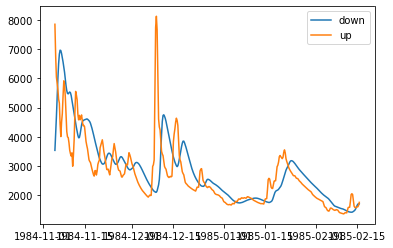

In [5]:
wrapper=pd.DataFrame(route,index=upflow_2zone_2route[1].index)
sa=pd.DataFrame(m_2zone_2route.uptribs[:,1],index=upflow_2zone_2route[0].index)

d_start='11/5/1984'
d_end='2/15/1985'

plt.plot(wrapper.loc[d_start:d_end],label='down')
plt.plot(sa.loc[d_start:d_end],label='up')
plt.legend()

In [4]:
m_2zone_2route = Model(forcings_2zone_2route,pars_2zone_2route,upflow_2zone_2route,flow)
route=m_2zone_2route.lagk_run(1)

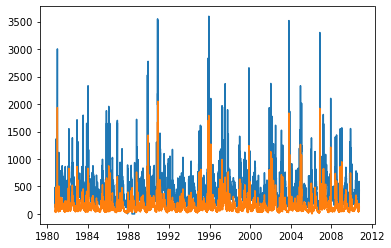

In [22]:
m_2zone_2route = Model(forcings_2zone_2route,pars_2zone_2route,upflow_2zone_2route,flow)
par=m_2zone_2route.p
z=[0,1]

t=s.lagk(m_2zone_2route.dt_hours,m_2zone_2route.dt_hours,'METR',par['lagq'][:,z],
                    par['kq'][:,z], par['init_co'][z],par['init_if'][z],
                    par['init_of'][z],par['init_stor'][z],
                    m_2zone_2route.uptribs[:,z]*0.0283168)



plt.plot(pd.DataFrame(t,index=upflow_2zone_2route[0].index))
#k_start=int(t[17])
#k_len=int(t[k_start-1])
#pina7_len=int(t[k_start+2*k_len])
#p_end=k_start+2*(k_len+pina7_len)+1
#t=t[:p_end]
#t

In [9]:
m_2zone_2route = Model(forcings_2zone_2route,pars_2zone_2route,upflow_2zone_2route,flow)
par=m_2zone_2route.p
z=0

p, c = lagk.pin7(m_2zone_2route.dt_hours,m_2zone_2route.dt_hours,par['n_lagq'][z],par['n_kq'][z],
        'METR',par['lagq'][:,z],par['kq'][:,z],par['init_co'][z],par['init_if'][z],par['init_of'][z],
        par['init_stor'][z])


c_copy=c.copy()
qb=lagk.flag7(p,c_copy,m_2zone_2route.uptribs[:,z]*0.0283168)
qc=lagk.fka7(p,c_copy,qb)

#c_copy=c.copy()
#qb=s.flag7(p,c_copy,sakw1*0.0283168)
#k_start=int(p[17])
#k_len=int(p[k_start-1])
#pina7_len=int(p[k_start+2*k_len])
#p_end=k_start+2*(k_len+pina7_len)+1
#p=p[:p_end]
#p

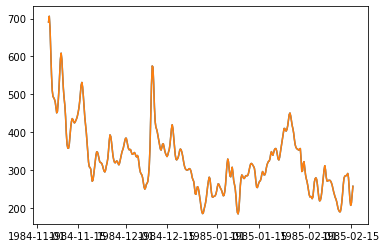

In [19]:
wrapper=pd.DataFrame(t,index=upflow_2zone_2route[0].index)
sa=pd.DataFrame(qc,index=upflow_2zone_2route[0].index)

d_start='11/5/1984'
d_end='2/15/1985'

plt.plot(wrapper.loc[d_start:d_end])
plt.plot(sa.loc[d_start:d_end])

In [14]:
np.max(np.squeeze(t)-p)

0.0

In [22]:
m_2zone_2route = Model(forcings_2zone_2route,pars_2zone_2route,upflow_2zone_2route,flow)

In [7]:
m_2zone_2route.lagk_run()

TypeError: Required argument 'qb' (pos 4) not found

In [42]:
m_1zone = Model(forcings_1zone,pars_1zone,obs=flow)
sim_flow_cfs_1zone = m_1zone.run()

In [12]:
m_2zone = Model(forcings_2zone,pars_2zone,flow)
sim_flow_cfs_2zone = m_2zone.run()

In [16]:
#RUN LAGK#
ts_in=6
ts_out=6
units='ENGL'#'METR'
lagq=np.array([6, 0, 4, 10000, 3.5, 20000, 3, 40000, 3, 100000],dtype='f4')
len_lagq=len(lagq)/2
kq=np.array([1, 100, 1, 40000, 3, 100000],dtype='f4')
len_kq=len(kq)/2
init_co=float(6025)
init_if=float(6018)
init_of=float(6018)
init_stor=float(6307)

In [17]:
p, c = s.pin7(ts_in,ts_out,len_lagq,len_kq,units,lagq,kq,init_co,init_if,init_of,init_stor)

In [ ]:
k_start=int(p[17])
k_len=int(p[k_start-1])
pina7_len=int(p[k_start+2*k_len])
p_end=k_start+2*(k_len+pina7_len)+1
p=p[:p_end]
c=c[:int(c[0])]

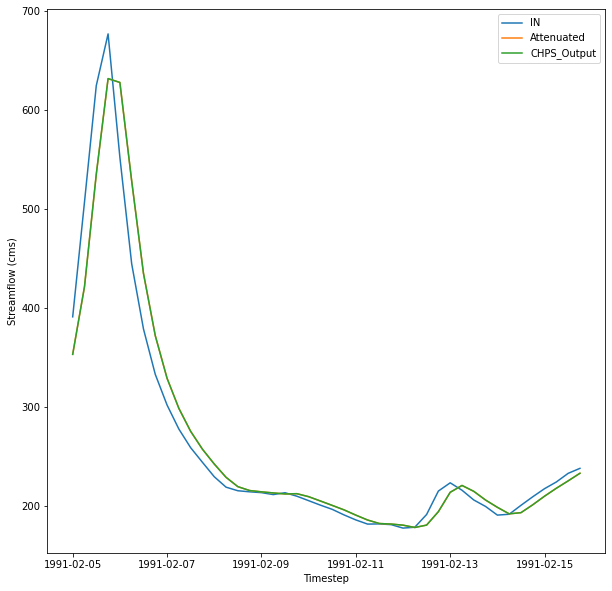

In [19]:
c_copy=c.copy()
qb=s.flag7(p,c_copy,sakw1*0.0283168)
qc=s.fka7(p,c_copy,qb)

fortran_output=pd.DataFrame({'Lagged':qb,'Attenuated':qc},index=sakw1_chps.index)

#ts_test['Lagged']=qb*35.3147#qb[:len(ts)]*35.3147
#ts_test['Attenuated']=qc*35.3147#qb[:len(ts)]*35.3147
#ts_test.to_csv(os.path.join(folder,'Lag_Operation_Output.csv'))

d_start='2/5/1991'
d_end='2/15/1991'
    
plt.plot(sakw1_chps.loc[d_start:d_end].SAKW1*0.0283168,label='IN')
#plt.plot(fortran_output.loc[d_start:d_end].Lagged,label='Lagged')
plt.plot(fortran_output.loc[d_start:d_end].Attenuated,label='Attenuated')
plt.plot(sakw1_chps.loc[d_start:d_end].SAKW1R*0.0283168,label='CHPS_Output')
#plt.plot(ts_test_lagged*0.0283168,label='Lagged')
#plt.plot(ts_test.index,qc[:len(ts)],label='Attenuated')

plt.xlabel('Timestep') 
plt.ylabel('Streamflow (cms)')

plt.legend()
 
plt.rcParams["figure.figsize"] = (10,10)
#ts_test['Lagged']=qb[:len(ts)]*35.3147
#ts_test['Attenuated']=qc[:len(ts)]*35.3147
#ts_test.to_csv(os.path.join(folder,'Lag_Operation_Output.csv'))

In [89]:
ops_lagk_parm.loc[:,((ops_lagk_parm.columns.str.contains('LAG'))&(~ops_lagk_parm.columns.str.contains('_')))|(ops_lagk_parm.columns.str.contains('CONSTANT_LAG'))].max()

CONSTANT_LAG_VALUE    22.0
LAG1                  60.0
LAG2                  40.0
LAG3                  30.0
LAG4                  27.0
LAG5                  24.0
LAG6                  12.0
LAG7                  18.0
LAG8                   NaN
dtype: float64

In [90]:
ops_lagk_parm.loc[:,((ops_lagk_parm.columns.str.contains('K'))&(~ops_lagk_parm.columns.str.contains('_')))|(ops_lagk_parm.columns.str.contains('CONSTANT_K'))].max()

CONSTANT_K_VALUE    12.0
K1                  12.0
K2                  60.0
K3                  30.0
K4                   3.0
K5                   9.0
K6                   NaN
K7                   NaN
K8                   NaN
dtype: float64

In [46]:
ops_lagk_parm=pd.read_csv('LAGK_Parameters.csv',index_col='Id')
lag=ops_lagk_parm.loc[:,(ops_lagk_parm.columns.str.contains('LAG'))&(~ops_lagk_parm.columns.str.contains('_'))]
lag_q=ops_lagk_parm.loc[:,ops_lagk_parm.columns.str.contains('LAG_')&(~ops_lagk_parm.columns.str.contains('CONSTANT'))]

k=ops_lagk_parm.loc[:,(ops_lagk_parm.columns.str.contains('K'))&(~ops_lagk_parm.columns.str.contains('_'))]
k_q=ops_lagk_parm.loc[:,ops_lagk_parm.columns.str.contains('K_')&(~ops_lagk_parm.columns.str.contains('CONSTANT'))]

In [75]:
if len(lag_df)>1 or len(k_df)>1:
    print(True)

True


In [79]:
for lid in range(len(ops_lagk_parm)):

    lag_df=pd.DataFrame({'Q':lag_q.loc[lag_q.index[lid]].values},index=lag.loc[lag.index[lid]].values).dropna()
    k_df=pd.DataFrame({'Lag':k_q.loc[k_q.index[lid]].values},index=k.loc[k.index[lid]].values).dropna()

    if len(lag_df)>1 or len(k_df)>1:

        fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, dpi= 80, facecolor='w',figsize=(10, 10))

        if len(lag_df)>1:
            ax1.plot(lag_df)
        if len(k_df)>1:
            ax2.plot(k_df)

        ax1.set_xlabel('Lag (hr)')
        ax2.set_xlabel('k (hr)')
        ax1.set_ylabel('Streamflow (Q)')
        ax2.set_ylabel('Streamflow (Q)')

        ax1.grid()
        ax2.grid()

        ax1.title.set_text('LAG-Q')
        ax2.title.set_text('K-Q')

        fig.suptitle(ops_lagk_parm.index[lid], fontsize=16)

        #Set tight layout
        fig.tight_layout

        fig.savefig('legacy_lagk_tables\\'+ops_lagk_parm.index[lid]+'_tables.png')

        plt.clf()
        plt.close('all')  

In [78]:
range(len(ops_lagk_parm))

range(0, 210)